# **Analysis 1: Whole-brain comparisons**

*Date:* 27 May 2025

*Description:* This notebook compares whole-brain means for the Travelling Heads (TRAMFIX) dataset.

There are 4 key analyses run here:
1. Comparing whole-brain means for FBA metrics (using site-specific pipeline)
2. Comparing whole-brain means for FBA metrics (using group pipeline)
3. Comparing whole-brain means for DTI metrics for comparison (using site-specific pipeline)
4. Comparing whole-brain means for DTI metrics for comparison (using group pipeline)

## **Set up: Import data**

In [1]:
import os
import pandas as pd

## Input dir & data
input_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/Analysis1_wholebrain'

/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/remika/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
## set up data 

# FD
fd_df_dir = os.path.join(input_dir, 'FD_wholebrain_means_medians.csv')
fd_df = pd.read_csv(fd_df_dir, sep=',', skipinitialspace=True)
fd_df[['ID', 'Site']] = fd_df['ID'].str.split('_', expand=True)

# FC
fc_df_dir = os.path.join(input_dir, 'FC_wholebrain_means_medians.csv')
fc_df = pd.read_csv(fc_df_dir, sep=',', skipinitialspace=True)
fc_df[['ID','Site']] = fc_df['ID'].str.split('_', expand=True)

# FDC
fdc_df_dir = os.path.join(input_dir, 'FDC_wholebrain_means_medians.csv')
fdc_df = pd.read_csv(fdc_df_dir, sep=',',skipinitialspace=True)
fdc_df[['ID', 'Site']] = fdc_df['ID'].str.split('_', expand=True)

In [3]:
# outdir for plots
output_dir = '/Users/remika/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/RESEARCH_PROJECTS/DECRA/TravellingHeads/Data/plots'

In [4]:
## FA & ADC

# FA (WM only)
fa_wm_df_dir = os.path.join(input_dir, 'FA_WMmask_means_medians.csv')
fa_wm_df = pd.read_csv(fa_wm_df_dir, sep=',', skipinitialspace=True)
fa_wm_df[['ID', 'Site']] = fa_wm_df['ID'].str.split('_', expand=True)

# ADC (WM only)
adc_wm_df_dir = os.path.join(input_dir, 'ADC_WMmask_means_medians.csv')
adc_wm_df = pd.read_csv(adc_wm_df_dir, sep=',', skipinitialspace=True)
adc_wm_df[['ID', 'Site']] = adc_wm_df['ID'].str.split('_', expand=True)

# FA (WM only)
fa_skel_df_dir = os.path.join(input_dir, 'FA_FA_skel_means_medians.csv')
fa_skel_df = pd.read_csv(fa_skel_df_dir, sep=',', skipinitialspace=True)
fa_skel_df[['ID', 'Site']] = fa_skel_df['ID'].str.split('_', expand=True)

# ADC (WM only)
adc_skel_df_dir = os.path.join(input_dir, 'ADC_FA_skel_means_medians.csv')
adc_skel_df = pd.read_csv(adc_skel_df_dir, sep=',', skipinitialspace=True)
adc_skel_df[['ID', 'Site']] = adc_skel_df['ID'].str.split('_', expand=True)

# **FBA metrics (site-specific pipeline)**

## **Whole-brain FD**

### Step 1: Compute means & CV

In [3]:
# CV of mean FD
mean_fd = fd_df['means'].mean()
std_fd = fd_df['means'].std(ddof=1)
cv_fd = std_fd/mean_fd*100

print("mean value for FD (whole-brain mean) is: ", mean_fd)
print("std for FD (whole-brain mean) is: ", std_fd)
print("CV for FD (whole-brain mean) is: ", cv_fd)

mean value for FD (whole-brain mean) is:  0.313575125
std for FD (whole-brain mean) is:  0.007534925038973426
CV for FD (whole-brain mean) is:  2.402909044195845


In [7]:
# CV of median FD
mean_fd_medians = fd_df['medians'].mean()
std_fd_medians = fd_df['medians'].std(ddof=1)
cv_fd_medians = std_fd_medians/mean_fd_medians*100

print("mean value for FD (whole-brain median) is: ", mean_fd_medians)
print("std for FD (whole-brain median) is: ", std_fd_medians)
print("CV for FD (whole-brain median) is: ", cv_fd_medians)

mean value for FD (whole-brain median) is:  0.2660589255
std for FD (whole-brain median) is:  0.005920572619626797
CV for FD (whole-brain median) is:  2.225286225034686


### Step 2: CV per site

In [4]:
mean_data_fd = fd_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fd)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.314403    0.310809  0.312476  0.313877
1     TH002      0.320827    0.321683  0.318773  0.325831
2     TH003      0.304182    0.298363  0.304115  0.307615
3     TH004      0.313682    0.307068  0.313410  0.319502
4     TH005      0.309864    0.306649  0.312728  0.315626
5     TH006      0.307849    0.305690  0.308616  0.314748
6     TH007      0.317700    0.314572  0.318100  0.324314
7     TH008      0.309576    0.307351  0.307606  0.309993
8     TH009      0.310647    0.303558  0.309455  0.312672
9     TH010      0.328914    0.322938  0.324115  0.333108


In [10]:
fd_means_floreyPrisma_cv = (mean_data_fd['FloreyPrisma'].std()/mean_data_fd['FloreyPrisma'].mean())*100
fd_means_floreyVida_cv = (mean_data_fd['FloreyVida'].std()/mean_data_fd['FloreyVida'].mean())*100
fd_means_MBI_cv = (mean_data_fd['MBI'].std()/mean_data_fd['MBI'].mean())*100
fd_means_RCH_cv = (mean_data_fd['RCH'].std()/mean_data_fd['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fd['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fd['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fd['MBI'].mean())
print("RCH mean is", mean_data_fd['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fd['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fd['FloreyVida'].std())
print("MBI std is: ", mean_data_fd['MBI'].std())
print("RCH std is", mean_data_fd['RCH'].std())

print("Florey Prisma CV is: ", fd_means_floreyPrisma_cv)
print("Florey Vida CV is: ", fd_means_floreyVida_cv)
print("MBI CV is: ", fd_means_MBI_cv)
print("RCH CV is", fd_means_RCH_cv)

Florey Prisma mean is:  0.3137644
Florey Vida mean is:  0.30986810000000004
MBI mean is:  0.3129394
RCH mean is 0.3177286
Florey Prisma std is:  0.007184726008848362
Florey Vida std is:  0.0078003296290748035
MBI std is:  0.005992454815107997
RCH std is 0.007919880838048558
Florey Prisma CV is:  2.2898474169945224
Florey Vida CV is:  2.51730643750512
MBI CV is:  1.9148930480176025
RCH CV is 2.492655945372421


In [9]:
median_data_fd = fd_df.pivot(index='ID', columns='Site', values='medians').reset_index()
print(median_data_fd)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.266245    0.262837  0.262693  0.265458
1     TH002      0.270810    0.269907  0.267982  0.275311
2     TH003      0.260157    0.254938  0.260317  0.263696
3     TH004      0.271369    0.264462  0.269087  0.275570
4     TH005      0.264618    0.260792  0.266883  0.269781
5     TH006      0.259134    0.256864  0.259724  0.264672
6     TH007      0.267481    0.263616  0.266022  0.272019
7     TH008      0.263695    0.261133  0.262439  0.263632
8     TH009      0.265742    0.258122  0.262719  0.266962
9     TH010      0.279575    0.271668  0.272314  0.281910


In [11]:
fd_medians_floreyPrisma_cv = (median_data_fd['FloreyPrisma'].std()/median_data_fd['FloreyPrisma'].mean())*100
fd_medians_floreyVida_cv = (median_data_fd['FloreyVida'].std()/median_data_fd['FloreyVida'].mean())*100
fd_medians_MBI_cv = (median_data_fd['MBI'].std()/median_data_fd['MBI'].mean())*100
fd_medians_RCH_cv = (median_data_fd['RCH'].std()/median_data_fd['RCH'].mean())*100

print("Florey Prisma mean is: ", median_data_fd['FloreyPrisma'].mean())
print("Florey Vida mean is: ", median_data_fd['FloreyVida'].mean())
print("MBI mean is: ", median_data_fd['MBI'].mean())
print("RCH mean is", median_data_fd['RCH'].mean())

print("Florey Prisma std is: ", median_data_fd['FloreyPrisma'].std())
print("Florey Vida std is: ", median_data_fd['FloreyVida'].std())
print("MBI std is: ", median_data_fd['MBI'].std())
print("RCH std is", median_data_fd['RCH'].std())

print("Florey Prisma CV is: ", fd_medians_floreyPrisma_cv)
print("Florey Vida CV is: ", fd_medians_floreyVida_cv)
print("MBI CV is: ", fd_medians_MBI_cv)
print("RCH CV is", fd_medians_RCH_cv)

Florey Prisma mean is:  0.2668827116
Florey Vida mean is:  0.2624339133
MBI mean is:  0.2650178253
RCH mean is 0.26990125179999996
Florey Prisma std is:  0.005956037237144641
Florey Vida std is:  0.005343398189996268
MBI std is:  0.004089799134562585
RCH std is 0.006179107979356897
Florey Prisma CV is:  2.231705906102852
Florey Vida CV is:  2.0360928672690215
MBI CV is:  1.5432166232339033
RCH CV is 2.2893958209336835


### Step 3: ICC across sites

In [12]:
import pingouin as pg

icc_fd_means = pg.intraclass_corr(data=fd_df, targets='ID', raters='Site', ratings='means')
print(icc_fd_means)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.772359  14.571561    9   30   
1   ICC2     Single random raters  0.781513  55.227319    9   27   
2   ICC3      Single fixed raters  0.931304  55.227319    9   27   
3  ICC1k  Average raters absolute  0.931373  14.571561    9   30   
4  ICC2k    Average random raters  0.934673  55.227319    9   27   
5  ICC3k     Average fixed raters  0.981893  55.227319    9   27   

           pval         CI95%  
0  1.042575e-08  [0.54, 0.93]  
1  4.562301e-15  [0.34, 0.94]  
2  4.562301e-15  [0.83, 0.98]  
3  1.042575e-08  [0.82, 0.98]  
4  4.562301e-15  [0.67, 0.98]  
5  4.562301e-15  [0.95, 0.99]  


In [13]:
icc_fd_medians = pg.intraclass_corr(data=fd_df, targets='ID', raters='Site', ratings='medians')
print(icc_fd_medians)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.651450   8.476108    9   30   
1   ICC2     Single random raters  0.672648  32.998866    9   27   
2   ICC3      Single fixed raters  0.888885  32.998866    9   27   
3  ICC1k  Average raters absolute  0.882021   8.476108    9   30   
4  ICC2k    Average random raters  0.891531  32.998866    9   27   
5  ICC3k     Average fixed raters  0.969696  32.998866    9   27   

           pval         CI95%  
0  3.582894e-06  [0.36, 0.88]  
1  2.694607e-12   [0.22, 0.9]  
2  2.694607e-12  [0.74, 0.97]  
3  3.582894e-06   [0.7, 0.97]  
4  2.694607e-12  [0.52, 0.97]  
5  2.694607e-12  [0.92, 0.99]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/3652366064.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fd_df, x="Site", y="means", palette="hls",


Text(0, 0.5, 'Mean FD')

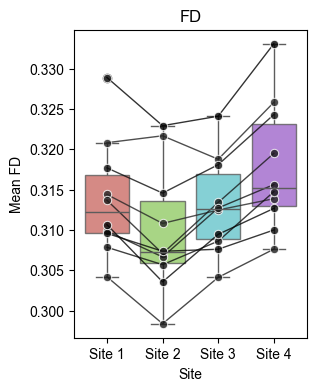

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fd_df, x="Site", y="means", palette="hls",
            boxprops={'alpha': 0.8})
            #whiskerprops=dict(color='grey'))  # Box transparency

# lines between IDs
sns.lineplot(data=fd_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("FD")
#plt.xlabel("Site")
plt.ylabel("Mean FD")

#plt.savefig(os.path.join(output_dir, "boxplot_fd_means_siteRFs.svg"), format="svg")


### Step 5: CVws & CVbs

In [73]:
site_fd = mean_data_fd.iloc[:, 1:]
print(site_fd)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.314403    0.310809  0.312476  0.313877
1         0.320827    0.321683  0.318773  0.325831
2         0.304182    0.298363  0.304115  0.307615
3         0.313682    0.307068  0.313410  0.319502
4         0.309864    0.306649  0.312728  0.315626
5         0.307849    0.305690  0.308616  0.314748
6         0.317700    0.314572  0.318100  0.324314
7         0.309576    0.307351  0.307606  0.309993
8         0.310647    0.303558  0.309455  0.312672
9         0.328914    0.322938  0.324115  0.333108


In [79]:
subject_means_fd = site_fd.mean(axis=1)
subject_stds_fd = site_fd.std(axis=1, ddof=1)

cvws_indiv_fd = subject_stds_fd / subject_means_fd
CVws_fd = cvws_indiv_fd.mean() * 100
print(CVws_fd)

1.1223307251518642


In [126]:
### Alternative CVws from QIBA guidelines
subject_var_fd = site_fd.var(axis=1)

cvws_squared_indiv_fd = subject_var_fd / (subject_means_fd ** 2)

CVws_qiba_fd = np.sqrt(cvws_squared_indiv_fd.mean())*100
print(CVws_qiba_fd)

1.1796438385971224


In [132]:
### Alternative CVws from paper
wssd = np.sqrt((subject_means_fd ** 2).mean() * (10 / 3))
cvws_alt_fd = ( wssd / mean_fd ) 
print(cvws_alt_fd)


1.8261600479579627


In [78]:
group_mean_fd = subject_means_fd.mean()
group_std_fd = subject_means_fd.std(ddof=1)
CVbs_fd = group_std_fd / group_mean_fd * 100
print(CVbs_fd)

2.25624128769856


### Step 6: ANOVA/linear model

In [ ]:
## check normality assumptions
from scipy.stats import shapiro
import pandas as pd

# Test normality per site (Shapiro-Wilk test)
for site in fd_df['Site'].unique():
    stat, p = shapiro(fd_df[fd_df['Site'] == site]['means'])
    print(f"Shapiro-Wilk test for {site}: p = {p:.4f}")

# all normal (p > 0.05)

Shapiro-Wilk test for FloreyPrisma: p = 0.5345
Shapiro-Wilk test for FloreyVida: p = 0.3867
Shapiro-Wilk test for MBI: p = 0.8598
Shapiro-Wilk test for RCH: p = 0.5727


In [154]:
import statsmodels.formula.api as smf

# Fit LMM with random effect for ID
lmm_df_fd_means = smf.mixedlm("means ~ Site", data=fd_df, groups=fd_df["ID"]).fit()
print(lmm_df_fd_means.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   means   
No. Observations:     40        Method:               REML    
No. Groups:           10        Scale:                0.0000  
Min. group size:      4         Log-Likelihood:       151.7571
Max. group size:      4         Converged:            Yes     
Mean group size:      4.0                                     
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           0.314    0.002 136.581 0.000  0.309  0.318
Site[T.FloreyVida] -0.004    0.001  -4.576 0.000 -0.006 -0.002
Site[T.MBI]        -0.001    0.001  -0.969 0.333 -0.002  0.001
Site[T.RCH]         0.004    0.001   4.655 0.000  0.002  0.006
Group Var           0.000    0.014                            



/Users/remika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/remika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [155]:
# repoeated-measures ANOVA

from statsmodels.stats.anova import AnovaRM

anova_rm_df1 = AnovaRM(data=fd_df, depvar="means", subject="ID", within=["Site"]).fit()
print(anova_rm_df1)

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
Site 28.9008 3.0000 27.0000 0.0000



/Users/remika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


In [156]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for post-hoc pairwise comparisons
tukey_df1 = pairwise_tukeyhsd(fd_df["means"], fd_df["Site"], alpha=0.05)
print(tukey_df1)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
FloreyPrisma FloreyVida  -0.0039 0.6313 -0.0126 0.0049  False
FloreyPrisma        MBI  -0.0008 0.9942 -0.0096 0.0079  False
FloreyPrisma        RCH    0.004 0.6183 -0.0048 0.0127  False
  FloreyVida        MBI   0.0031 0.7807 -0.0057 0.0118  False
  FloreyVida        RCH   0.0079 0.0914 -0.0009 0.0166  False
         MBI        RCH   0.0048 0.4632  -0.004 0.0135  False
-------------------------------------------------------------


## **Whole-brain FC**

### Step 1: Compute means & CV

In [15]:
# CV of mean FC
mean_fc = fc_df['means'].mean()
std_fc = fc_df['means'].std(ddof=1)
cv_fc = std_fc/mean_fc*100

print("mean value for FC (whole-brain mean) is: ", mean_fc)
print("std for FC (whole-brain mean) is: ", std_fc)
print("CV for FC (whole-brain mean) is: ", cv_fc)

mean value for FC (whole-brain mean) is:  1.0467763
std for FC (whole-brain mean) is:  0.06476281891530365
CV for FC (whole-brain mean) is:  6.186882423236335


In [16]:
# CV of median FC
mean_fc_medians = fc_df['medians'].mean()
std_fc_medians = fc_df['medians'].std(ddof=1)
cv_fc_medians = std_fc_medians/mean_fc_medians*100

print("mean value for FC (whole-brain median) is: ", mean_fc_medians)
print("std for FC (whole-brain median) is: ", std_fc_medians)
print("CV for FC (whole-brain median) is: ", cv_fc_medians)

mean value for FC (whole-brain median) is:  1.031186389975
std for FC (whole-brain median) is:  0.06230604860960702
CV for FC (whole-brain median) is:  6.042171348975772


### Step 2: CV per site

In [17]:
mean_data_fc = fc_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fc)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.999014    0.994907  0.990251  0.996313
1     TH002      1.046310    1.055630  1.041510  1.042890
2     TH003      0.968249    0.971072  0.950948  0.971198
3     TH004      1.114220    1.109440  1.109910  1.114680
4     TH005      1.003260    1.002560  1.006080  1.010000
5     TH006      1.018380    1.019070  1.006790  1.027750
6     TH007      1.002780    1.003240  0.999140  1.008290
7     TH008      1.032370    1.036930  1.020120  1.029670
8     TH009      1.113320    1.106100  1.104220  1.114340
9     TH010      1.184310    1.184260  1.175370  1.186160


In [18]:
fc_means_floreyPrisma_cv = (mean_data_fc['FloreyPrisma'].std()/mean_data_fc['FloreyPrisma'].mean())*100
fc_means_floreyVida_cv = (mean_data_fc['FloreyVida'].std()/mean_data_fc['FloreyVida'].mean())*100
fc_means_MBI_cv = (mean_data_fc['MBI'].std()/mean_data_fc['MBI'].mean())*100
fc_means_RCH_cv = (mean_data_fc['RCH'].std()/mean_data_fc['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fc['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fc['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fc['MBI'].mean())
print("RCH mean is", mean_data_fc['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fc['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fc['FloreyVida'].std())
print("MBI std is: ", mean_data_fc['MBI'].std())
print("RCH std is", mean_data_fc['RCH'].std())

print("Florey Prisma CV is: ", fc_means_floreyPrisma_cv)
print("Florey Vida CV is: ", fc_means_floreyVida_cv)
print("MBI CV is: ", fc_means_MBI_cv)
print("RCH CV is", fc_means_RCH_cv)

Florey Prisma mean is:  1.0482213
Florey Vida mean is:  1.0483209
MBI mean is:  1.0404339
RCH mean is 1.0501291
Florey Prisma std is:  0.06762854489382093
Florey Vida std is:  0.0662813725842756
MBI std is:  0.06836218660186995
RCH std is 0.0668773451965944
Florey Prisma CV is:  6.451743052141845
Florey Vida CV is:  6.322622451224201
MBI CV is:  6.570545865707561
RCH CV is 6.368487950347667


In [26]:
median_data_fc = fc_df.pivot(index='ID', columns='Site', values='medians').reset_index()
print(median_data_fc)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.990130    0.985223  0.980540  0.988203
1     TH002      1.030089    1.037235  1.022114  1.025013
2     TH003      0.952845    0.956551  0.931992  0.955161
3     TH004      1.099750    1.096358  1.094977  1.099341
4     TH005      0.987585    0.987542  0.989856  0.994876
5     TH006      1.002067    1.004879  0.991958  1.010560
6     TH007      0.991483    0.992432  0.988376  0.997559
7     TH008      1.019357    1.023745  1.007992  1.017585
8     TH009      1.091826    1.082200  1.080140  1.093010
9     TH010      1.164239    1.162609  1.154112  1.165946


In [27]:
fc_medians_floreyPrisma_cv = (median_data_fc['FloreyPrisma'].std()/median_data_fc['FloreyPrisma'].mean())*100
fc_medians_floreyVida_cv = (median_data_fc['FloreyVida'].std()/median_data_fc['FloreyVida'].mean())*100
fc_medians_MBI_cv = (median_data_fc['MBI'].std()/median_data_fc['MBI'].mean())*100
fc_medians_RCH_cv = (median_data_fc['RCH'].std()/median_data_fc['RCH'].mean())*100

print("Florey Prisma mean is: ", median_data_fc['FloreyPrisma'].mean())
print("Florey Vida mean is: ", median_data_fc['FloreyVida'].mean())
print("MBI mean is: ", median_data_fc['MBI'].mean())
print("RCH mean is", median_data_fc['RCH'].mean())

print("Florey Prisma std is: ", median_data_fc['FloreyPrisma'].std())
print("Florey Vida std is: ", median_data_fc['FloreyVida'].std())
print("MBI std is: ", median_data_fc['MBI'].std())
print("RCH std is", median_data_fc['RCH'].std())

print("Florey Prisma CV is: ", fc_medians_floreyPrisma_cv)
print("Florey Vida CV is: ", fc_medians_floreyVida_cv)
print("MBI CV is: ", fc_medians_MBI_cv)
print("RCH CV is", fc_medians_RCH_cv)

Florey Prisma mean is:  1.0329370494
Florey Vida mean is:  1.0328773015000001
MBI mean is:  1.0242058754000003
RCH mean is 1.0347253336
Florey Prisma std is:  0.06526861692311926
Florey Vida std is:  0.06321646354378309
MBI std is:  0.06599133993975394
RCH std is 0.06431468814043255
Florey Prisma CV is:  6.318741007598836
Florey Vida CV is:  6.1204233505738515
MBI CV is:  6.443171390125177
RCH CV is 6.215629022696285


### Step 3: ICC across sites

In [19]:
icc_fc_means = pg.intraclass_corr(data=fc_df, targets='ID', raters='Site', ratings='means')
print(icc_fc_means)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.992179  508.466252    9   30   
1   ICC2     Single random raters  0.992187  963.598441    9   27   
2   ICC3      Single fixed raters  0.995862  963.598441    9   27   
3  ICC1k  Average raters absolute  0.998033  508.466252    9   30   
4  ICC2k    Average random raters  0.998035  963.598441    9   27   
5  ICC3k     Average fixed raters  0.998962  963.598441    9   27   

           pval        CI95%  
0  2.871376e-30  [0.98, 1.0]  
1  1.810810e-31  [0.97, 1.0]  
2  1.810810e-31  [0.99, 1.0]  
3  2.871376e-30  [0.99, 1.0]  
4  1.810810e-31  [0.99, 1.0]  
5  1.810810e-31   [1.0, 1.0]  


In [20]:
icc_fc_medians = pg.intraclass_corr(data=fc_df, targets='ID', raters='Site', ratings='medians')
print(icc_fc_medians)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.990443  415.532503    9   30   
1   ICC2     Single random raters  0.990454  845.245189    9   27   
2   ICC3      Single fixed raters  0.995284  845.245189    9   27   
3  ICC1k  Average raters absolute  0.997593  415.532503    9   30   
4  ICC2k    Average random raters  0.997596  845.245189    9   27   
5  ICC3k     Average fixed raters  0.998817  845.245189    9   27   

           pval        CI95%  
0  5.772869e-29  [0.98, 1.0]  
1  1.054487e-30  [0.96, 1.0]  
2  1.054487e-30  [0.99, 1.0]  
3  5.772869e-29  [0.99, 1.0]  
4  1.054487e-30  [0.99, 1.0]  
5  1.054487e-30   [1.0, 1.0]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/1197214056.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fc_df, x="Site", y="means", palette="hls",


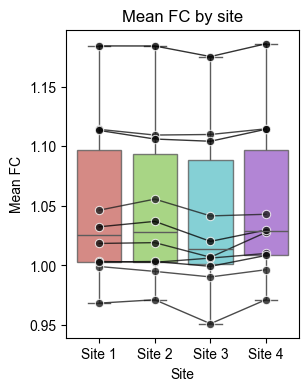

In [34]:
## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fc_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fc_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("Mean FC by site")
#plt.xlabel("Site")
plt.ylabel("Mean FC")

plt.savefig(os.path.join(output_dir, "boxplot_fc_means_siteRFs.svg"), format="svg")


### Step 5: CVws & CVbs

In [90]:
site_fc = mean_data_fc.iloc[:, 1:]
print(site_fc)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.999014    0.994907  0.990251  0.996313
1         1.046310    1.055630  1.041510  1.042890
2         0.968249    0.971072  0.950948  0.971198
3         1.114220    1.109440  1.109910  1.114680
4         1.003260    1.002560  1.006080  1.010000
5         1.018380    1.019070  1.006790  1.027750
6         1.002780    1.003240  0.999140  1.008290
7         1.032370    1.036930  1.020120  1.029670
8         1.113320    1.106100  1.104220  1.114340
9         1.184310    1.184260  1.175370  1.186160


In [91]:
subject_means_fc = site_fc.mean(axis=1)
subject_stds_fc = site_fc.std(axis=1, ddof=1)

cvws_indiv_fc = subject_stds_fc / subject_means_fc
CVws_fc = cvws_indiv_fc.mean() * 100
print(CVws_fc)

0.5344370826371253


In [133]:
### Alternative CVws from QIBA guidelines
subject_var_fc = site_fc.var(axis=1)

cvws_squared_indiv_fc = subject_var_fc / (subject_means_fc ** 2)

CVws_qiba_fc = np.sqrt(cvws_squared_indiv_fc.mean())*100
print(CVws_qiba_fc)

0.583022048982416


In [92]:
group_mean_fc = subject_means_fc.mean()
group_std_fc = subject_means_fc.std(ddof=1)
CVbs_fc = group_std_fc / group_mean_fc * 100
print(CVbs_fc)

6.418506975828368


## **Whole-brain FDC**

### Step 1: Compute means & CV

In [22]:
# CV of mean FDC
mean_fdc = fdc_df['means'].mean()
std_fdc = fdc_df['means'].std(ddof=1)
cv_fdc = std_fdc/mean_fdc*100

print("mean value for FDC (whole-brain mean) is: ", mean_fdc)
print("std for FDC (whole-brain mean) is: ", std_fdc)
print("CV for FDC (whole-brain mean) is: ", cv_fdc)

mean value for FDC (whole-brain mean) is:  0.327885625
std for FDC (whole-brain mean) is:  0.026362740366376935
CV for FDC (whole-brain mean) is:  8.040224504010181


In [23]:
# CV of median FC
mean_fdc_medians = fdc_df['medians'].mean()
std_fdc_medians = fdc_df['medians'].std(ddof=1)
cv_fdc_medians = std_fdc_medians/mean_fdc_medians*100

print("mean value for FDC (whole-brain median) is: ", mean_fdc_medians)
print("std for FDC (whole-brain median) is: ", std_fdc_medians)
print("CV for FDC (whole-brain median) is: ", cv_fdc_medians)

mean value for FDC (whole-brain median) is:  0.27714511342500003
std for FDC (whole-brain median) is:  0.02089250366884073
CV for FDC (whole-brain median) is:  7.538470879261807


### Step 2: CV per site

In [24]:
mean_data_fdc = fdc_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fdc)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.315000    0.309980  0.310672  0.313956
1     TH002      0.336412    0.340711  0.333051  0.340784
2     TH003      0.294670    0.290205  0.289126  0.299237
3     TH004      0.349207    0.339754  0.348012  0.356805
4     TH005      0.307753    0.304296  0.311755  0.316226
5     TH006      0.313403    0.311067  0.310648  0.323852
6     TH007      0.315276    0.312087  0.314837  0.324129
7     TH008      0.316741    0.316309  0.311088  0.316664
8     TH009      0.345308    0.334523  0.341300  0.348182
9     TH010      0.390437    0.383755  0.381278  0.396929


In [ ]:
fdc_means_floreyPrisma_cv = (mean_data_fdc['FloreyPrisma'].std()/mean_data_fdc['FloreyPrisma'].mean())*100
fdc_means_floreyVida_cv = (mean_data_fdc['FloreyVida'].std()/mean_data_fdc['FloreyVida'].mean())*100
fdc_means_MBI_cv = (mean_data_fdc['MBI'].std()/mean_data_fdc['MBI'].mean())*100
fdc_means_RCH_cv = (mean_data_fdc['RCH'].std()/mean_data_fdc['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fdc['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fdc['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fdc['MBI'].mean())
print("RCH mean is", mean_data_fdc['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fdc['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fdc['FloreyVida'].std())
print("MBI std is: ", mean_data_fdc['MBI'].std())
print("RCH std is", mean_data_fdc['RCH'].std())

print("Florey Prisma CV is: ", fdc_means_floreyPrisma_cv)
print("Florey Vida CV is: ", fdc_means_floreyVida_cv)
print("MBI CV is: ", fdc_means_MBI_cv)
print("RCH CV is", fdc_means_RCH_cv)

Florey Prisma mean is:  0.3284207
Florey Vida mean is:  0.3242686999999999
MBI mean is:  0.3251767
RCH mean is 0.3336764
Florey Prisma std is:  0.027705278510501283
Florey Vida std is:  0.02646456997173559
MBI std is:  0.026241268393505678
RCH std is 0.028192454267055213
Florey Prisma CV is:  8.435911168358535
Florey Vida CV is:  8.1613088070898
MBI CV is:  8.069848913992201
RCH CV is 8.449040527605552


In [28]:
median_data_fdc = fdc_df.pivot(index='ID', columns='Site', values='medians').reset_index()
print(median_data_fdc)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.265139    0.261299  0.260027  0.263262
1     TH002      0.281717    0.282686  0.276907  0.284707
2     TH003      0.252760    0.248556  0.248518  0.256147
3     TH004      0.300107    0.290949  0.296846  0.303782
4     TH005      0.264922    0.261640  0.268198  0.271615
5     TH006      0.261110    0.258956  0.259024  0.268826
6     TH007      0.266669    0.263770  0.265168  0.273244
7     TH008      0.271224    0.268770  0.266708  0.269870
8     TH009      0.293392    0.283648  0.287974  0.294718
9     TH010      0.327077    0.318149  0.317783  0.329937


In [29]:
fdc_medians_floreyPrisma_cv = (median_data_fdc['FloreyPrisma'].std()/median_data_fdc['FloreyPrisma'].mean())*100
fdc_medians_floreyVida_cv = (median_data_fdc['FloreyVida'].std()/median_data_fdc['FloreyVida'].mean())*100
fdc_medians_MBI_cv = (median_data_fdc['MBI'].std()/median_data_fdc['MBI'].mean())*100
fdc_medians_RCH_cv = (median_data_fdc['RCH'].std()/median_data_fdc['RCH'].mean())*100

print("Florey Prisma mean is: ", median_data_fdc['FloreyPrisma'].mean())
print("Florey Vida mean is: ", median_data_fdc['FloreyVida'].mean())
print("MBI mean is: ", median_data_fdc['MBI'].mean())
print("RCH mean is", median_data_fdc['RCH'].mean())

print("Florey Prisma std is: ", median_data_fdc['FloreyPrisma'].std())
print("Florey Vida std is: ", median_data_fdc['FloreyVida'].std())
print("MBI std is: ", median_data_fdc['MBI'].std())
print("RCH std is", median_data_fdc['RCH'].std())

print("Florey Prisma CV is: ", fdc_medians_floreyPrisma_cv)
print("Florey Vida CV is: ", fdc_medians_floreyVida_cv)
print("MBI CV is: ", fdc_medians_MBI_cv)
print("RCH CV is", fdc_medians_RCH_cv)

Florey Prisma mean is:  0.27841186519999994
Florey Vida mean is:  0.2738424437
MBI mean is:  0.27471536099999994
RCH mean is 0.28161078380000004
Florey Prisma std is:  0.022557160550235242
Florey Vida std is:  0.020342934873487258
MBI std is:  0.020739643035755956
RCH std is 0.02227267920300678
Florey Prisma CV is:  8.102083053835036
Florey Vida CV is:  7.428700459514362
MBI CV is:  7.549502496060262
RCH CV is 7.909029229088342


### Step 3: ICC across sites

In [30]:
icc_fdc_means = pg.intraclass_corr(data=fdc_df, targets='ID', raters='Site', ratings='means')
print(icc_fdc_means)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.963444  106.421957    9   30   
1   ICC2     Single random raters  0.963651  280.796210    9   27   
2   ICC3      Single fixed raters  0.985905  280.796210    9   27   
3  ICC1k  Average raters absolute  0.990603  106.421957    9   30   
4  ICC2k    Average random raters  0.990658  280.796210    9   27   
5  ICC3k     Average fixed raters  0.996439  280.796210    9   27   

           pval         CI95%  
0  2.841945e-20  [0.91, 0.99]  
1  2.706895e-24  [0.84, 0.99]  
2  2.706895e-24   [0.96, 1.0]  
3  2.841945e-20   [0.98, 1.0]  
4  2.706895e-24   [0.95, 1.0]  
5  2.706895e-24   [0.99, 1.0]  


In [31]:
icc_fdc_medians = pg.intraclass_corr(data=fdc_df, targets='ID', raters='Site', ratings='medians')
print(icc_fdc_medians)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.960729   98.856644    9   30   
1   ICC2     Single random raters  0.960981  287.730670    9   27   
2   ICC3      Single fixed raters  0.986242  287.730670    9   27   
3  ICC1k  Average raters absolute  0.989884   98.856644    9   30   
4  ICC2k    Average random raters  0.989951  287.730670    9   27   
5  ICC3k     Average fixed raters  0.996525  287.730670    9   27   

           pval         CI95%  
0  8.233274e-20   [0.9, 0.99]  
1  1.955664e-24  [0.82, 0.99]  
2  1.955664e-24   [0.96, 1.0]  
3  8.233274e-20   [0.97, 1.0]  
4  1.955664e-24   [0.95, 1.0]  
5  1.955664e-24   [0.99, 1.0]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/53860655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fdc_df, x="Site", y="means", palette="hls",


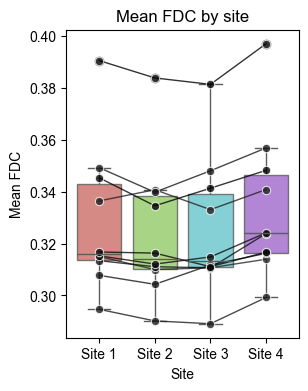

In [35]:
## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fdc_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fdc_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("Mean FDC by site")
#plt.xlabel("Site")
plt.ylabel("Mean FDC")

plt.savefig(os.path.join(output_dir, "boxplot_fdc_means_siteRFs.svg"), format="svg")


### Step 5: CVws & CVbs

In [93]:
site_fdc = mean_data_fdc.iloc[:, 1:]
print(site_fdc)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.315000    0.309980  0.310672  0.313956
1         0.336412    0.340711  0.333051  0.340784
2         0.294670    0.290205  0.289126  0.299237
3         0.349207    0.339754  0.348012  0.356805
4         0.307753    0.304296  0.311755  0.316226
5         0.313403    0.311067  0.310648  0.323852
6         0.315276    0.312087  0.314837  0.324129
7         0.316741    0.316309  0.311088  0.316664
8         0.345308    0.334523  0.341300  0.348182
9         0.390437    0.383755  0.381278  0.396929


In [94]:
subject_means_fdc = site_fdc.mean(axis=1)
subject_stds_fdc = site_fdc.std(axis=1, ddof=1)

cvws_indiv_fdc = subject_stds_fdc / subject_means_fdc
CVws_fdc = cvws_indiv_fdc.mean() * 100
print(CVws_fdc)

1.5163882603494878


In [134]:
### Alternative CVws from QIBA guidelines
subject_var_fdc = site_fdc.var(axis=1)

cvws_squared_indiv_fdc = subject_var_fdc / (subject_means_fdc ** 2)

CVws_qiba_fdc = np.sqrt(cvws_squared_indiv_fdc.mean())*100
print(CVws_qiba_fdc)

1.5726136209839874


In [95]:
group_mean_fdc = subject_means_fdc.mean()
group_std_fdc = subject_means_fdc.std(ddof=1)
CVbs_fdc = group_std_fdc / group_mean_fdc * 100
print(CVbs_fdc)

8.24047256277764


# **FBA metrics (group pipeline)**

## **Import data**

In [49]:
## set up data 

# FD
fd_pop2_df_dir = os.path.join(input_dir, 'FD_wholebrain_means_medians_poptemp2.csv')
fd_pop2_df = pd.read_csv(fd_pop2_df_dir, sep=',', skipinitialspace=True)
fd_pop2_df[['ID', 'Site']] = fd_pop2_df['ID'].str.split('_', expand=True)

# FC
fc_pop2_df_dir = os.path.join(input_dir, 'FC_wholebrain_means_medians_poptemp2.csv')
fc_pop2_df = pd.read_csv(fc_pop2_df_dir, sep=',', skipinitialspace=True)
fc_pop2_df[['ID','Site']] = fc_pop2_df['ID'].str.split('_', expand=True)

# FDC
fdc_pop2_df_dir = os.path.join(input_dir, 'FDC_wholebrain_means_medians_poptemp2.csv')
fdc_pop2_df = pd.read_csv(fdc_pop2_df_dir, sep=',',skipinitialspace=True)
fdc_pop2_df[['ID', 'Site']] = fdc_pop2_df['ID'].str.split('_', expand=True)

## **Whole-brain FD**

### Step 1: Compute means & CV

In [50]:
# CV of mean FD
mean_fd_pop2 = fd_pop2_df['means'].mean()
std_fd_pop2 = fd_pop2_df['means'].std(ddof=1)
cv_fd_pop2 = std_fd_pop2/mean_fd_pop2*100

print("mean value for FD (whole-brain mean) is: ", mean_fd_pop2)
print("std for FD (whole-brain mean) is: ", std_fd_pop2)
print("CV for FD (whole-brain mean) is: ", cv_fd_pop2)

mean value for FD (whole-brain mean) is:  0.31293407500000003
std for FD (whole-brain mean) is:  0.007564698015859848
CV for FD (whole-brain mean) is:  2.417345575377129


### Step 2: CV per site

In [51]:
mean_data_fd_pop2 = fd_pop2_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fd_pop2)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.316937    0.310024  0.312455  0.308951
1     TH002      0.323904    0.321429  0.318991  0.321089
2     TH003      0.306481    0.297899  0.304472  0.302982
3     TH004      0.316198    0.306430  0.313492  0.314726
4     TH005      0.312138    0.305720  0.313052  0.310880
5     TH006      0.309986    0.304907  0.308477  0.309634
6     TH007      0.320159    0.313999  0.318317  0.319487
7     TH008      0.312293    0.307013  0.307905  0.305229
8     TH009      0.313179    0.302867  0.309581  0.307738
9     TH010      0.332265    0.322684  0.324788  0.328605


In [52]:
fd_means_floreyPrisma_cv_pop2 = (mean_data_fd_pop2['FloreyPrisma'].std()/mean_data_fd_pop2['FloreyPrisma'].mean())*100
fd_means_floreyVida_cv_pop2 = (mean_data_fd_pop2['FloreyVida'].std()/mean_data_fd_pop2['FloreyVida'].mean())*100
fd_means_MBI_cv_pop2 = (mean_data_fd_pop2['MBI'].std()/mean_data_fd_pop2['MBI'].mean())*100
fd_means_RCH_cv_pop2 = (mean_data_fd_pop2['RCH'].std()/mean_data_fd_pop2['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fd_pop2['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fd_pop2['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fd_pop2['MBI'].mean())
print("RCH mean is", mean_data_fd_pop2['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fd_pop2['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fd_pop2['FloreyVida'].std())
print("MBI std is: ", mean_data_fd_pop2['MBI'].std())
print("RCH std is", mean_data_fd_pop2['RCH'].std())

print("Florey Prisma CV is: ", fd_means_floreyPrisma_cv_pop2)
print("Florey Vida CV is: ", fd_means_floreyVida_cv_pop2)
print("MBI CV is: ", fd_means_MBI_cv_pop2)
print("RCH CV is", fd_means_RCH_cv_pop2)

Florey Prisma mean is:  0.31635399999999997
Florey Vida mean is:  0.3092972
MBI mean is:  0.313153
RCH mean is 0.3129321
Florey Prisma std is:  0.007508359977755166
Florey Vida std is:  0.007928830680217332
MBI std is:  0.006094260651538379
RCH std is 0.007990398772554756
Florey Prisma CV is:  2.3734044702311863
Florey Vida CV is:  2.563499016550209
MBI CV is:  1.9460968445259594
RCH CV is 2.5533969741534204


### Step 3: ICC across sites

In [53]:
icc_fd_means_pop2 = pg.intraclass_corr(data=fd_pop2_df, targets='ID', raters='Site', ratings='means')
print(icc_fd_means_pop2)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.806641  17.686955    9   30   
1   ICC2     Single random raters  0.812732  54.065370    9   27   
2   ICC3      Single fixed raters  0.929905  54.065370    9   27   
3  ICC1k  Average raters absolute  0.943461  17.686955    9   30   
4  ICC2k    Average random raters  0.945533  54.065370    9   27   
5  ICC3k     Average fixed raters  0.981504  54.065370    9   27   

           pval         CI95%  
0  1.046882e-09  [0.59, 0.94]  
1  5.967683e-15  [0.42, 0.95]  
2  5.967683e-15  [0.83, 0.98]  
3  1.046882e-09  [0.85, 0.98]  
4  5.967683e-15  [0.75, 0.99]  
5  5.967683e-15  [0.95, 0.99]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/2812364342.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fd_pop2_df, x="Site", y="means", palette="hls",


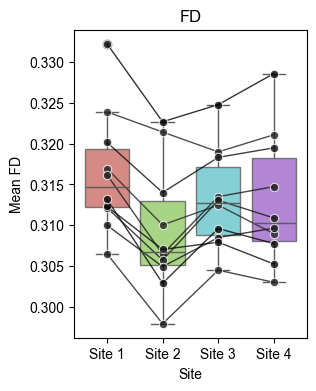

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fd_pop2_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fd_pop2_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("FD")
#plt.xlabel("Site")
plt.ylabel("Mean FD")

plt.savefig(os.path.join(output_dir, "boxplot_fd_means_groupRFs.svg"), format="svg")


### Step 5: CVws & CVbs

In [103]:
site_fd_pop2 = mean_data_fd_pop2.iloc[:, 1:]
print(site_fd_pop2)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.316937    0.310024  0.312455  0.308951
1         0.323904    0.321429  0.318991  0.321089
2         0.306481    0.297899  0.304472  0.302982
3         0.316198    0.306430  0.313492  0.314726
4         0.312138    0.305720  0.313052  0.310880
5         0.309986    0.304907  0.308477  0.309634
6         0.320159    0.313999  0.318317  0.319487
7         0.312293    0.307013  0.307905  0.305229
8         0.313179    0.302867  0.309581  0.307738
9         0.332265    0.322684  0.324788  0.328605


In [104]:
subject_means_fd_pop2 = site_fd_pop2.mean(axis=1)
subject_stds_fd_pop2 = site_fd_pop2.std(axis=1, ddof=1)

cvws_indiv_fd_pop2 = subject_stds_fd_pop2 / subject_means_fd_pop2
CVws_fd_pop2 = cvws_indiv_fd_pop2.mean() * 100
print(CVws_fd_pop2)

1.0697219462908165


In [135]:
### Alternative CVws from QIBA guidelines
subject_var_fd_pop2 = site_fd_pop2.var(axis=1)

cvws_squared_indiv_fd_pop2 = subject_var_fd_pop2 / (subject_means_fd_pop2 ** 2)

CVws_qiba_fd_pop2 = np.sqrt(cvws_squared_indiv_fd_pop2.mean())*100
print(CVws_qiba_fd_pop2)

1.098493309545483


In [105]:
group_mean_fd_pop2 = subject_means_fd_pop2.mean()
group_std_fd_pop2 = subject_means_fd_pop2.std(ddof=1)
CVbs_fd_pop2 = group_std_fd_pop2 / group_mean_fd_pop2 * 100
print(CVbs_fd_pop2)

2.3079531776387228


## **Whole-brain FC**

### Step 1: Compute means & CV

In [56]:
# CV of mean FC
mean_fc_pop2 = fc_pop2_df['means'].mean()
std_fc_pop2 = fc_pop2_df['means'].std(ddof=1)
cv_fc_pop2 = std_fc_pop2/mean_fc_pop2*100

print("mean value for FC (whole-brain mean) is: ", mean_fc_pop2)
print("std for FC (whole-brain mean) is: ", std_fc_pop2)
print("CV for FC (whole-brain mean) is: ", cv_fc_pop2)

mean value for FC (whole-brain mean) is:  1.0542144
std for FC (whole-brain mean) is:  0.0649606612460819
CV for FC (whole-brain mean) is:  6.161997146508518


### Step 2: CV per site

In [57]:
mean_data_fc_pop2 = fc_pop2_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fc_pop2)

Site     ID  FloreyPrisma  FloreyVida       MBI      RCH
0     TH001      1.007950     1.00194  0.999505  1.00066
1     TH002      1.054910     1.06233  1.050370  1.04681
2     TH003      0.976496     0.97806  0.959545  0.97528
3     TH004      1.123890     1.11698  1.119470  1.11894
4     TH005      1.011850     1.00960  1.015560  1.01473
5     TH006      1.027670     1.02572  1.016170  1.03238
6     TH007      1.011560     1.01024  1.008130  1.01225
7     TH008      1.041230     1.04397  1.029270  1.03407
8     TH009      1.122850     1.11382  1.114060  1.11883
9     TH010      1.193850     1.19171  1.185390  1.19053


In [58]:
fc_means_floreyPrisma_cv_pop2 = (mean_data_fc_pop2['FloreyPrisma'].std()/mean_data_fc_pop2['FloreyPrisma'].mean())*100
fc_means_floreyVida_cv_pop2 = (mean_data_fc_pop2['FloreyVida'].std()/mean_data_fc_pop2['FloreyVida'].mean())*100
fc_means_MBI_cv_pop2 = (mean_data_fc_pop2['MBI'].std()/mean_data_fc_pop2['MBI'].mean())*100
fc_means_RCH_cv_pop2 = (mean_data_fc_pop2['RCH'].std()/mean_data_fc_pop2['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fc_pop2['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fc_pop2['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fc_pop2['MBI'].mean())
print("RCH mean is", mean_data_fc_pop2['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fc_pop2['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fc_pop2['FloreyVida'].std())
print("MBI std is: ", mean_data_fc_pop2['MBI'].std())
print("RCH std is", mean_data_fc_pop2['RCH'].std())

print("Florey Prisma CV is: ", fc_means_floreyPrisma_cv_pop2)
print("Florey Vida CV is: ", fc_means_floreyVida_cv_pop2)
print("MBI CV is: ", fc_means_MBI_cv_pop2)
print("RCH CV is", fc_means_RCH_cv_pop2)

Florey Prisma mean is:  1.0572255999999998
Florey Vida mean is:  1.055437
MBI mean is:  1.049747
RCH mean is 1.0544480000000003
Florey Prisma std is:  0.06802069183744344
Florey Vida std is:  0.06651773381754841
MBI std is:  0.0687224512562428
RCH std is 0.0669179274767067
Florey Prisma CV is:  6.4338861863961165
Florey Vida CV is:  6.302387903545964
MBI CV is:  6.546572770033427
RCH CV is 6.346252017805211


### Step 3: Compute ICC

In [59]:
icc_fc_means_pop2 = pg.intraclass_corr(data=fc_pop2_df, targets='ID', raters='Site', ratings='means')
print(icc_fc_means_pop2)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.993979  661.365231    9   30   
1   ICC2     Single random raters  0.993982  945.492490    9   27   
2   ICC3      Single fixed raters  0.995783  945.492490    9   27   
3  ICC1k  Average raters absolute  0.998488  661.365231    9   30   
4  ICC2k    Average random raters  0.998489  945.492490    9   27   
5  ICC3k     Average fixed raters  0.998942  945.492490    9   27   

           pval        CI95%  
0  5.719581e-32  [0.98, 1.0]  
1  2.336971e-31  [0.98, 1.0]  
2  2.336971e-31  [0.99, 1.0]  
3  5.719581e-32   [1.0, 1.0]  
4  2.336971e-31   [1.0, 1.0]  
5  2.336971e-31   [1.0, 1.0]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/8868020.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fc_pop2_df, x="Site", y="means", palette="hls",


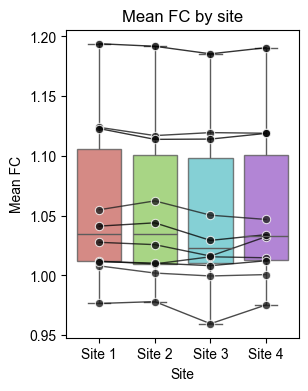

In [60]:
## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fc_pop2_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fc_pop2_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("Mean FC by site")
#plt.xlabel("Site")
plt.ylabel("Mean FC")

plt.savefig(os.path.join(output_dir, "boxplot_fc_means_groupRFs.svg"), format="svg")


### Step 5: CVws and CVbs

In [106]:
site_fc_pop2 = mean_data_fc_pop2.iloc[:, 1:]
print(site_fc_pop2)

Site  FloreyPrisma  FloreyVida       MBI      RCH
0         1.007950     1.00194  0.999505  1.00066
1         1.054910     1.06233  1.050370  1.04681
2         0.976496     0.97806  0.959545  0.97528
3         1.123890     1.11698  1.119470  1.11894
4         1.011850     1.00960  1.015560  1.01473
5         1.027670     1.02572  1.016170  1.03238
6         1.011560     1.01024  1.008130  1.01225
7         1.041230     1.04397  1.029270  1.03407
8         1.122850     1.11382  1.114060  1.11883
9         1.193850     1.19171  1.185390  1.19053


In [107]:
subject_means_fc_pop2 = site_fc_pop2.mean(axis=1)
subject_stds_fc_pop2 = site_fc_pop2.std(axis=1, ddof=1)

cvws_indiv_fc_pop2 = subject_stds_fc_pop2 / subject_means_fc_pop2
CVws_fc_pop2 = cvws_indiv_fc_pop2.mean() * 100
print(CVws_fc_pop2)

0.46032578521180395


In [136]:
### Alternative CVws from QIBA guidelines
subject_var_fc_pop2 = site_fc_pop2.var(axis=1)

cvws_squared_indiv_fc_pop2 = subject_var_fc_pop2 / (subject_means_fc_pop2 ** 2)

CVws_qiba_fc_pop2 = np.sqrt(cvws_squared_indiv_fc_pop2.mean())*100
print(CVws_qiba_fc_pop2)

0.5098546053057844


In [108]:
group_mean_fc_pop2 = subject_means_fc_pop2.mean()
group_std_fc_pop2 = subject_means_fc_pop2.std(ddof=1)
CVbs_fc_pop2 = group_std_fc_pop2 / group_mean_fc_pop2 * 100
print(CVbs_fc_pop2)

6.397508262248552


## **Whole-brain FDC**

### Step 1: Compute means & CV

In [61]:
# CV of mean FDC
mean_fdc_pop2 = fdc_pop2_df['means'].mean()
std_fdc_pop2 = fdc_pop2_df['means'].std(ddof=1)
cv_fdc_pop2 = std_fdc_pop2/mean_fdc_pop2*100

print("mean value for FDC (whole-brain mean) is: ", mean_fdc_pop2)
print("std for FDC (whole-brain mean) is: ", std_fdc_pop2)
print("CV for FDC (whole-brain mean) is: ", cv_fdc_pop2)

mean value for FDC (whole-brain mean) is:  0.329736325
std for FDC (whole-brain mean) is:  0.02652799065465981
CV for FDC (whole-brain mean) is:  8.045213294185835


### Step 2: CV per site

In [62]:
mean_data_fdc_pop2 = fdc_pop2_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fdc_pop2)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.320922    0.311550  0.313725  0.310168
1     TH002      0.342987    0.342893  0.336355  0.336878
2     TH003      0.299920    0.292062  0.292248  0.295828
3     TH004      0.355657    0.341619  0.351327  0.352582
4     TH005      0.313145    0.305683  0.315199  0.312675
5     TH006      0.318948    0.312540  0.313641  0.319779
6     TH007      0.321013    0.313944  0.318088  0.320384
7     TH008      0.322791    0.318349  0.314417  0.312935
8     TH009      0.351652    0.336301  0.344691  0.343739
9     TH010      0.398245    0.386185  0.385572  0.392816


In [63]:
fdc_means_floreyPrisma_cv_pop2 = (mean_data_fdc_pop2['FloreyPrisma'].std()/mean_data_fdc_pop2['FloreyPrisma'].mean())*100
fdc_means_floreyVida_cv_pop2 = (mean_data_fdc_pop2['FloreyVida'].std()/mean_data_fdc_pop2['FloreyVida'].mean())*100
fdc_means_MBI_cv_pop2 = (mean_data_fdc_pop2['MBI'].std()/mean_data_fdc_pop2['MBI'].mean())*100
fdc_means_RCH_cv_pop2 = (mean_data_fdc_pop2['RCH'].std()/mean_data_fdc_pop2['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fdc_pop2['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fdc_pop2['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fdc_pop2['MBI'].mean())
print("RCH mean is", mean_data_fdc_pop2['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fdc_pop2['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fdc_pop2['FloreyVida'].std())
print("MBI std is: ", mean_data_fdc_pop2['MBI'].std())
print("RCH std is", mean_data_fdc_pop2['RCH'].std())

print("Florey Prisma CV is: ", fdc_means_floreyPrisma_cv)
print("Florey Vida CV is: ", fdc_means_floreyVida_cv)
print("MBI CV is: ", fdc_means_MBI_cv)
print("RCH CV is", fdc_means_RCH_cv)

Florey Prisma mean is:  0.33452800000000005
Florey Vida mean is:  0.3261126
MBI mean is:  0.32852629999999994
RCH mean is 0.3297784
Florey Prisma std is:  0.02842982621981515
Florey Vida std is:  0.026699920970336646
MBI std is:  0.026539452699079293
RCH std is 0.027969651160578403
Florey Prisma CV is:  8.435911168358535
Florey Vida CV is:  8.1613088070898
MBI CV is:  8.069848913992201
RCH CV is 8.449040527605552


### Step 3: Compute ICC

In [64]:
icc_fdc_means_pop2 = pg.intraclass_corr(data=fdc_pop2_df, targets='ID', raters='Site', ratings='means')
print(icc_fdc_means_pop2)

    Type              Description       ICC           F  df1  df2  \
0   ICC1   Single raters absolute  0.970740  133.703818    9   30   
1   ICC2     Single random raters  0.970849  275.096704    9   27   
2   ICC3      Single fixed raters  0.985617  275.096704    9   27   
3  ICC1k  Average raters absolute  0.992521  133.703818    9   30   
4  ICC2k    Average random raters  0.992549  275.096704    9   27   
5  ICC3k     Average fixed raters  0.996365  275.096704    9   27   

           pval         CI95%  
0  1.038158e-21  [0.93, 0.99]  
1  3.557189e-24  [0.89, 0.99]  
2  3.557189e-24   [0.96, 1.0]  
3  1.038158e-21   [0.98, 1.0]  
4  3.557189e-24   [0.97, 1.0]  
5  3.557189e-24   [0.99, 1.0]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/1826996523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fdc_pop2_df, x="Site", y="means", palette="hls",


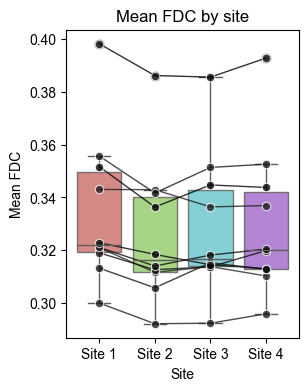

In [65]:
## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fdc_pop2_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fdc_pop2_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("Mean FDC by site")
#plt.xlabel("Site")
plt.ylabel("Mean FDC")

plt.savefig(os.path.join(output_dir, "boxplot_fdc_means_groupRFs.svg"), format="svg")


### Step 5: CVws & CVbs

In [109]:
site_fdc_pop2 = mean_data_fdc_pop2.iloc[:, 1:]
print(site_fdc_pop2)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.320922    0.311550  0.313725  0.310168
1         0.342987    0.342893  0.336355  0.336878
2         0.299920    0.292062  0.292248  0.295828
3         0.355657    0.341619  0.351327  0.352582
4         0.313145    0.305683  0.315199  0.312675
5         0.318948    0.312540  0.313641  0.319779
6         0.321013    0.313944  0.318088  0.320384
7         0.322791    0.318349  0.314417  0.312935
8         0.351652    0.336301  0.344691  0.343739
9         0.398245    0.386185  0.385572  0.392816


In [110]:
subject_means_fdc_pop2 = site_fdc_pop2.mean(axis=1)
subject_stds_fdc_pop2 = site_fdc_pop2.std(axis=1, ddof=1)

cvws_indiv_fdc_pop2 = subject_stds_fdc_pop2 / subject_means_fdc_pop2
CVws_fdc_pop2 = cvws_indiv_fdc_pop2.mean() * 100
print(CVws_fdc_pop2)

1.3832133790092187


In [137]:
### Alternative CVws from QIBA guidelines
subject_var_fdc_pop2 = site_fdc_pop2.var(axis=1)

cvws_squared_indiv_fdc_pop2 = subject_var_fdc_pop2 / (subject_means_fdc_pop2 ** 2)

CVws_qiba_fdc_pop2 = np.sqrt(cvws_squared_indiv_fdc_pop2.mean())*100
print(CVws_qiba_fdc_pop2)

1.4070955487342813


In [111]:
group_mean_fdc_pop2 = subject_means_fdc_pop2.mean()
group_std_fdc_pop2 = subject_means_fdc_pop2.std(ddof=1)
CVbs_fdc_pop2 = group_std_fdc_pop2 / group_mean_fdc_pop2 * 100
print(CVbs_fdc_pop2)

8.271254027524565


In [114]:
print(subject_stds_fdc_pop2)

0    0.004783
1    0.003657
2    0.003701
3    0.006064
4    0.004143
5    0.003665
6    0.003199
7    0.004416
8    0.006281
9    0.006002
dtype: float64


In [115]:
subject_var_fdc_pop2 = site_fdc_pop2.var(axis=1, ddof=1)
print(subject_var_fdc_pop2)

0    0.000023
1    0.000013
2    0.000014
3    0.000037
4    0.000017
5    0.000013
6    0.000010
7    0.000019
8    0.000039
9    0.000036
dtype: float64


In [118]:
import numpy as np
subject_means_fdc_pop2 = site_fdc_pop2.mean(axis=1)
subject_var_fdc_pop2 = site_fdc_pop2.var(axis=1, ddof=1)

cv_squared_fdc_pop2 = subject_var_fdc_pop2 / (subject_means_fdc_pop2 ** 2)
CVws_fdc_pop2_v2 = np.sqrt(cv_squared_fdc_pop2.mean()) * 100
print(CVws_fdc_pop2_v2)

1.4070955487342813


# **DTI metrics (site-specific pipeline)**

## **Whole-brain FA (WM mask)**

### Step 1: Means & CV 

In [37]:
# CV of mean FA
mean_fa_wm = fa_wm_df['means'].mean()
std_fa_wm = fa_wm_df['means'].std(ddof=1)
cv_fa_wm = std_fa_wm/mean_fa_wm*100

print("mean value for FA (whole-brain WM mask mean) is: ", mean_fa_wm)
print("std for FA (whole-brain WM mask mean) is: ", std_fa_wm)
print("CV for FA (whole-brain WM mask mean) is: ", cv_fa_wm)

mean value for FA (whole-brain WM mask mean) is:  0.30186324999999997
std for FA (whole-brain WM mask mean) is:  0.006834938233359986
CV for FA (whole-brain WM mask mean) is:  2.2642498659111325


In [38]:
# CV of median FA
mean_fa_wm_medians = fa_wm_df['medians'].mean()
std_fa_wm_medians = fa_wm_df['medians'].std(ddof=1)
cv_fa_wm_medians = std_fa_wm_medians/mean_fa_wm_medians*100

print("mean value for FA (whole-brain WM mask median) is: ", mean_fa_wm_medians)
print("std for FA (whole-brain WM mask median) is: ", std_fa_wm_medians)
print("CV for FA (whole-brain WM mask median) is: ", cv_fa_wm)

mean value for FA (whole-brain WM mask median) is:  0.260078828425
std for FA (whole-brain WM mask median) is:  0.006482311208467003
CV for FA (whole-brain WM mask median) is:  2.2642498659111325


### Step 2: CV per site

In [39]:
mean_data_fa_wm = fa_wm_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fa_wm)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.300967    0.290889  0.301069  0.298801
1     TH002      0.310901    0.309721  0.312484  0.312975
2     TH003      0.295905    0.286627  0.291792  0.291650
3     TH004      0.304946    0.300898  0.307297  0.307684
4     TH005      0.296743    0.289684  0.299605  0.294018
5     TH006      0.307611    0.302398  0.307593  0.307814
6     TH007      0.301112    0.291860  0.303361  0.298606
7     TH008      0.300816    0.297923  0.300693  0.300216
8     TH009      0.305453    0.298565  0.308475  0.306272
9     TH010      0.308961    0.301351  0.311741  0.309053


In [40]:
fa_wm_means_floreyPrisma_cv = (mean_data_fa_wm['FloreyPrisma'].std()/mean_data_fa_wm['FloreyPrisma'].mean())*100
fa_wm_means_floreyVida_cv = (mean_data_fa_wm['FloreyVida'].std()/mean_data_fa_wm['FloreyVida'].mean())*100
fa_wm_means_MBI_cv = (mean_data_fa_wm['MBI'].std()/mean_data_fa_wm['MBI'].mean())*100
fa_wm_means_RCH_cv = (mean_data_fa_wm['RCH'].std()/mean_data_fa_wm['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_fa_wm['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_fa_wm['FloreyVida'].mean())
print("MBI mean is: ", mean_data_fa_wm['MBI'].mean())
print("RCH mean is", mean_data_fa_wm['RCH'].mean())

print("Florey Prisma std is: ", mean_data_fa_wm['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_fa_wm['FloreyVida'].std())
print("MBI std is: ", mean_data_fa_wm['MBI'].std())
print("RCH std is", mean_data_fa_wm['RCH'].std())

print("Florey Prisma CV is: ", fa_wm_means_floreyPrisma_cv)
print("Florey Vida CV is: ", fa_wm_means_floreyVida_cv)
print("MBI CV is: ", fa_wm_means_MBI_cv)
print("RCH CV is", fa_wm_means_RCH_cv)

Florey Prisma mean is:  0.3033415
Florey Vida mean is:  0.2969916
MBI mean is:  0.304411
RCH mean is 0.30270889999999995
Florey Prisma std is:  0.005053217990108444
Florey Vida std is:  0.00709675359583521
MBI std is:  0.006344763632756979
RCH std is 0.007034050476077066
Florey Prisma CV is:  1.6658511908553375
Florey Vida CV is:  2.3895469083419227
MBI CV is:  2.0842754147376343
RCH CV is 2.3237012443562337


### Step 3: ICC

In [41]:
icc_fa_wm_means = pg.intraclass_corr(data=fa_wm_df, targets='ID', raters='Site', ratings='means')
print(icc_fa_wm_means)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.718493  11.209263    9   30   
1   ICC2     Single random raters  0.732968  48.780502    9   27   
2   ICC3      Single fixed raters  0.922751  48.780502    9   27   
3  ICC1k  Average raters absolute  0.910788  11.209263    9   30   
4  ICC2k    Average random raters  0.916524  48.780502    9   27   
5  ICC3k     Average fixed raters  0.979500  48.780502    9   27   

           pval         CI95%  
0  1.981981e-07  [0.46, 0.91]  
1  2.175666e-14  [0.26, 0.93]  
2  2.175666e-14  [0.81, 0.98]  
3  1.981981e-07  [0.77, 0.97]  
4  2.175666e-14  [0.59, 0.98]  
5  2.175666e-14  [0.95, 0.99]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/325219995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fa_wm_df, x="Site", y="means", palette="hls",


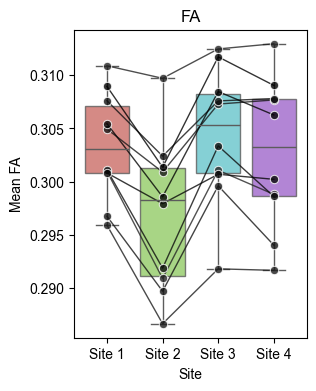

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=fa_wm_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=fa_wm_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("FA")
#plt.xlabel("Site")
plt.ylabel("Mean FA")

plt.savefig(os.path.join(output_dir, "boxplot_fa_means_WMmask.svg"), format="svg")


### Step 5: CVws and CVbs

In [87]:
site_fa = mean_data_fa_wm.iloc[:, 1:]
print(site_fa)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.300967    0.290889  0.301069  0.298801
1         0.310901    0.309721  0.312484  0.312975
2         0.295905    0.286627  0.291792  0.291650
3         0.304946    0.300898  0.307297  0.307684
4         0.296743    0.289684  0.299605  0.294018
5         0.307611    0.302398  0.307593  0.307814
6         0.301112    0.291860  0.303361  0.298606
7         0.300816    0.297923  0.300693  0.300216
8         0.305453    0.298565  0.308475  0.306272
9         0.308961    0.301351  0.311741  0.309053


In [88]:
subject_means_fa = site_fa.mean(axis=1)
subject_stds_fa = site_fa.std(axis=1, ddof=1)

cvws_indiv_fa = subject_stds_fa / subject_means_fa
CVws_fa = cvws_indiv_fa.mean() * 100
print(CVws_fa)

1.1683901908696268


In [ ]:
### Alternative CVws from QIBA guidelines
subject_var_fa = site_fa.var(axis=1)

cvws_squared_indiv_fa = subject_var_fa / (subject_means_fa ** 2)

CVws_qiba_fa = np.sqrt(cvws_squared_indiv_fa.mean())*100
print(CVws_qiba_fa)

NameError: name 'site_fa' is not defined

In [89]:
group_mean_fa = subject_means_fa.mean()
group_std_fa = subject_means_fa.std(ddof=1)
CVbs_fa = group_std_fa / group_mean_fa * 100
print(CVbs_fa)

2.0690593918437736


## **Whole-brain ADC (WM mask)**

### Step 1: Means & CV

In [43]:
# CV of mean ADC
mean_adc_wm = adc_wm_df['means'].mean()
std_adc_wm = adc_wm_df['means'].std(ddof=1)
cv_adc_wm = std_adc_wm/mean_adc_wm*100

print("mean value for ADC (whole-brain WM mask mean) is: ", mean_adc_wm)
print("std for ADC (whole-brain WM mask mean) is: ", std_adc_wm)
print("CV for ADC (whole-brain WM mask mean) is: ", cv_adc_wm)

mean value for ADC (whole-brain WM mask mean) is:  0.000840122075
std for ADC (whole-brain WM mask mean) is:  1.5021968429838062e-05
CV for ADC (whole-brain WM mask mean) is:  1.7880697194914277


In [44]:
# CV of median ADC
mean_adc_wm_medians = adc_wm_df['medians'].mean()
std_adc_wm_medians = adc_wm_df['medians'].std(ddof=1)
cv_adc_wm_medians = std_adc_wm_medians/mean_adc_wm_medians*100

print("mean value for ADC (whole-brain WM mask median) is: ", mean_adc_wm_medians)
print("std for ADC (whole-brain WM mask median) is: ", std_adc_wm_medians)
print("CV for ADC (whole-brain WM mask median) is: ", cv_adc_wm)

mean value for ADC (whole-brain WM mask median) is:  0.000742846747725
std for ADC (whole-brain WM mask median) is:  1.3148318714619783e-05
CV for ADC (whole-brain WM mask median) is:  1.7880697194914277


### Step 2: CV per site

In [45]:
mean_data_adc_wm = adc_wm_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_adc_wm)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.000836    0.000844  0.000820  0.000819
1     TH002      0.000839    0.000847  0.000828  0.000845
2     TH003      0.000842    0.000858  0.000822  0.000839
3     TH004      0.000849    0.000847  0.000853  0.000850
4     TH005      0.000840    0.000851  0.000832  0.000840
5     TH006      0.000812    0.000817  0.000809  0.000810
6     TH007      0.000860    0.000867  0.000853  0.000856
7     TH008      0.000832    0.000848  0.000827  0.000836
8     TH009      0.000856    0.000862  0.000851  0.000858
9     TH010      0.000838    0.000846  0.000825  0.000837


In [46]:
adc_wm_means_floreyPrisma_cv = (mean_data_adc_wm['FloreyPrisma'].std()/mean_data_adc_wm['FloreyPrisma'].mean())*100
adc_wm_means_floreyVida_cv = (mean_data_adc_wm['FloreyVida'].std()/mean_data_adc_wm['FloreyVida'].mean())*100
adc_wm_means_MBI_cv = (mean_data_adc_wm['MBI'].std()/mean_data_adc_wm['MBI'].mean())*100
adc_wm_means_RCH_cv = (mean_data_adc_wm['RCH'].std()/mean_data_adc_wm['RCH'].mean())*100

print("Florey Prisma mean is: ", mean_data_adc_wm['FloreyPrisma'].mean())
print("Florey Vida mean is: ", mean_data_adc_wm['FloreyVida'].mean())
print("MBI mean is: ", mean_data_adc_wm['MBI'].mean())
print("RCH mean is", mean_data_adc_wm['RCH'].mean())

print("Florey Prisma std is: ", mean_data_adc_wm['FloreyPrisma'].std())
print("Florey Vida std is: ", mean_data_adc_wm['FloreyVida'].std())
print("MBI std is: ", mean_data_adc_wm['MBI'].std())
print("RCH std is", mean_data_adc_wm['RCH'].std())

print("Florey Prisma CV is: ", adc_wm_means_floreyPrisma_cv)
print("Florey Vida CV is: ", adc_wm_means_floreyVida_cv)
print("MBI CV is: ", adc_wm_means_MBI_cv)
print("RCH CV is", adc_wm_means_RCH_cv)

Florey Prisma mean is:  0.0008404618000000001
Florey Vida mean is:  0.0008487871
MBI mean is:  0.000832256
RCH mean is 0.0008389833999999999
Florey Prisma std is:  1.3556294059300346e-05
Florey Vida std is:  1.3571342523043851e-05
MBI std is:  1.527055828856444e-05
RCH std is 1.4932159300575994e-05
Florey Prisma CV is:  1.6129577881231896
Florey Vida CV is:  1.5989100827573666
MBI CV is:  1.8348390745833543
RCH CV is 1.7797919840340102


### Step 3: ICC

In [47]:
icc_adc_wm_means = pg.intraclass_corr(data=adc_wm_df, targets='ID', raters='Site', ratings='means')
print(icc_adc_wm_means)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.696741  10.190046    9   30   
1   ICC2     Single random raters  0.709886  25.324994    9   27   
2   ICC3      Single fixed raters  0.858782  25.324994    9   27   
3  ICC1k  Average raters absolute  0.901865  10.190046    9   30   
4  ICC2k    Average random raters  0.907302  25.324994    9   27   
5  ICC3k     Average fixed raters  0.960513  25.324994    9   27   

           pval         CI95%  
0  5.481310e-07   [0.43, 0.9]  
1  6.325666e-11  [0.32, 0.91]  
2  6.325666e-11  [0.68, 0.96]  
3  5.481310e-07  [0.75, 0.97]  
4  6.325666e-11  [0.65, 0.98]  
5  6.325666e-11   [0.9, 0.99]  


### Step 4: Plot means

/var/folders/g8/w52c85dx1fsgxg5681hppls80000gn/T/ipykernel_79666/4227588073.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adc_wm_df, x="Site", y="means", palette="hls",


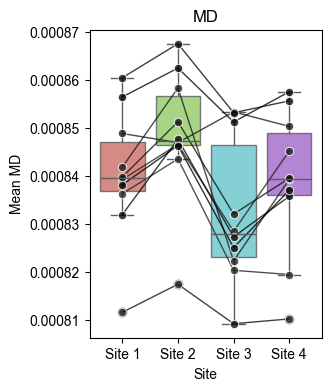

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plot means

plt.figure(figsize=(3, 4))

plt.rcParams['font.family'] = 'Arial'

# boxplot
sns.boxplot(data=adc_wm_df, x="Site", y="means", palette="hls", 
            boxprops={'alpha': 0.8})  # Box transparency

# lines between IDs
sns.lineplot(data=adc_wm_df, x="Site", y="means", hue="ID", marker="o", 
             palette="dark:k", alpha=0.8, linewidth=1, legend=False)  

# dummy labels
dummy_labels = ["Site 1", "Site 2", "Site 3", "Site 4"]
plt.xticks(ticks=range(len(dummy_labels)), labels=dummy_labels)

# plot headings
plt.title("MD")
#plt.xlabel("Site")
plt.ylabel("Mean MD")

plt.savefig(os.path.join(output_dir, "boxplot_adc_means_WMmask.svg"), format="svg")


### Step 5: CVws & CVbs

In [96]:
site_adc = mean_data_adc_wm.iloc[:, 1:]
print(site_adc)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.000836    0.000844  0.000820  0.000819
1         0.000839    0.000847  0.000828  0.000845
2         0.000842    0.000858  0.000822  0.000839
3         0.000849    0.000847  0.000853  0.000850
4         0.000840    0.000851  0.000832  0.000840
5         0.000812    0.000817  0.000809  0.000810
6         0.000860    0.000867  0.000853  0.000856
7         0.000832    0.000848  0.000827  0.000836
8         0.000856    0.000862  0.000851  0.000858
9         0.000838    0.000846  0.000825  0.000837


In [97]:
subject_means_adc = site_adc.mean(axis=1)
subject_stds_adc = site_adc.std(axis=1, ddof=1)

cvws_indiv_adc = subject_stds_adc / subject_means_adc
CVws_adc = cvws_indiv_adc.mean() * 100
print(CVws_adc)

0.9237982726746724


In [139]:
### Alternative CVws from QIBA guidelines
subject_var_adc = site_adc.var(axis=1)

cvws_squared_indiv_adc = subject_var_adc / (subject_means_adc ** 2)

CVws_qiba_adc = np.sqrt(cvws_squared_indiv_adc.mean())*100
print(CVws_qiba_adc)

1.0142445454590199


In [98]:
group_mean_adc = subject_means_adc.mean()
group_std_adc = subject_means_adc.std(ddof=1)
CVbs_adc = group_std_adc / group_mean_adc * 100
print(CVbs_adc)

1.6155148641548531


## **Whole-brain FA (FA skeleton)**

### Step 1: Means & CV

In [5]:
# CV of mean FA
mean_fa_skel = fa_skel_df['means'].mean()
std_fa_skel = fa_skel_df['means'].std(ddof=1)
cv_fa_skel = std_fa_skel/mean_fa_skel*100

print("mean value for FA (whole-brain FA skeleton mean) is: ", mean_fa_skel)
print("std for FA (whole-brain FA skeleton mean) is: ", std_fa_skel)
print("CV for FA (whole-brain FA skeleton mean) is: ", cv_fa_skel)

mean value for FA (whole-brain FA skeleton mean) is:  0.3785101
std for FA (whole-brain FA skeleton mean) is:  0.009385210634632036
CV for FA (whole-brain FA skeleton mean) is:  2.4795139243660964


### Step 2: CV per site

In [8]:
mean_data_fa_skel = fa_skel_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_fa_skel)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.378025    0.362925  0.377688  0.375086
1     TH002      0.391722    0.389691  0.393895  0.395018
2     TH003      0.371605    0.356917  0.366207  0.366148
3     TH004      0.383836    0.377017  0.386669  0.387480
4     TH005      0.371584    0.360939  0.375033  0.367942
5     TH006      0.385047    0.377052  0.385768  0.385672
6     TH007      0.378896    0.364964  0.381305  0.374709
7     TH008      0.377287    0.371977  0.376775  0.376314
8     TH009      0.384464    0.373538  0.387899  0.385185
9     TH010      0.386806    0.374279  0.390510  0.386530


### Step 3: ICC

In [7]:
import pingouin as pg
icc_fa_skel_means = pg.intraclass_corr(data=fa_skel_df, targets='ID', raters='Site', ratings='means')
print(icc_fa_skel_means)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.656796   8.654888    9   30   
1   ICC2     Single random raters  0.679037  44.986334    9   27   
2   ICC3      Single fixed raters  0.916643  44.986334    9   27   
3  ICC1k  Average raters absolute  0.884458   8.654888    9   30   
4  ICC2k    Average random raters  0.894320  44.986334    9   27   
5  ICC3k     Average fixed raters  0.977771  44.986334    9   27   

           pval         CI95%  
0  2.913723e-06  [0.37, 0.88]  
1  5.982553e-14  [0.19, 0.91]  
2  5.982553e-14   [0.8, 0.98]  
3  2.913723e-06   [0.7, 0.97]  
4  5.982553e-14  [0.49, 0.98]  
5  5.982553e-14  [0.94, 0.99]  


### Step 4: Plot means

### Step 5: CVws & CVbs

In [9]:
site_fa_skel = mean_data_fa_skel.iloc[:, 1:]
print(site_fa_skel)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.378025    0.362925  0.377688  0.375086
1         0.391722    0.389691  0.393895  0.395018
2         0.371605    0.356917  0.366207  0.366148
3         0.383836    0.377017  0.386669  0.387480
4         0.371584    0.360939  0.375033  0.367942
5         0.385047    0.377052  0.385768  0.385672
6         0.378896    0.364964  0.381305  0.374709
7         0.377287    0.371977  0.376775  0.376314
8         0.384464    0.373538  0.387899  0.385185
9         0.386806    0.374279  0.390510  0.386530


In [10]:
subject_means_fa_skel = site_fa_skel.mean(axis=1)
subject_stds_fa_skel = site_fa_skel.std(axis=1, ddof=1)

cvws_indiv_fa_skel = subject_stds_fa_skel / subject_means_fa_skel
CVws_fa_skel = cvws_indiv_fa_skel.mean() * 100
print(CVws_fa_skel)

1.422179218106083


In [13]:
import numpy as np

### Alternative CVws from QIBA guidelines
subject_var_fa_skel = site_fa_skel.var(axis=1)

cvws_squared_indiv_fa_skel = subject_var_fa_skel / (subject_means_fa_skel ** 2)

CVws_qiba_fa_skel = np.sqrt(cvws_squared_indiv_fa_skel.mean())*100
print(CVws_qiba_fa_skel)

1.4983212105955372


In [15]:
group_mean_fa_skel = subject_means_fa_skel.mean()
group_std_fa_skel = subject_means_fa_skel.std(ddof=1)
CVbs_fa_skel = group_std_fa_skel / group_mean_fa_skel * 100
print(CVbs_fa_skel)

2.192809755474752


## **Whole-brain ADC (FA skeleton)**

### Step 1: Compute means & CV

In [16]:
# CV of mean ADC
mean_adc_skel = adc_skel_df['means'].mean()
std_adc_skel = adc_skel_df['means'].std(ddof=1)
cv_adc_skel = std_adc_skel/mean_adc_skel*100

print("mean value for ADC (whole-brain FA skeleton mean) is: ", mean_adc_skel)
print("std for ADC (whole-brain FA skeleton mean) is: ", std_adc_skel)
print("CV for ADC (whole-brain FA skeleton mean) is: ", cv_adc_skel)

mean value for ADC (whole-brain FA skeleton mean) is:  0.00077074805
std for ADC (whole-brain FA skeleton mean) is:  1.193580163045359e-05
CV for ADC (whole-brain FA skeleton mean) is:  1.548599653343734


### Step 2: CV per site

In [17]:
mean_data_adc_skel = adc_skel_df.pivot(index='ID', columns='Site', values='means').reset_index()
print(mean_data_adc_skel)

Site     ID  FloreyPrisma  FloreyVida       MBI       RCH
0     TH001      0.000770    0.000779  0.000755  0.000755
1     TH002      0.000760    0.000768  0.000750  0.000762
2     TH003      0.000781    0.000798  0.000757  0.000776
3     TH004      0.000769    0.000770  0.000765  0.000767
4     TH005      0.000774    0.000786  0.000765  0.000775
5     TH006      0.000758    0.000765  0.000751  0.000756
6     TH007      0.000785    0.000798  0.000778  0.000784
7     TH008      0.000772    0.000789  0.000767  0.000774
8     TH009      0.000776    0.000783  0.000768  0.000775
9     TH010      0.000768    0.000779  0.000754  0.000766


### Step 3: Compute ICC

In [18]:
icc_adc_skel_means = pg.intraclass_corr(data=adc_skel_df, targets='ID', raters='Site', ratings='means')
print(icc_adc_skel_means)

    Type              Description       ICC          F  df1  df2  \
0   ICC1   Single raters absolute  0.390165   3.559148    9   30   
1   ICC2     Single random raters  0.454476  15.696813    9   27   
2   ICC3      Single fixed raters  0.786060  15.696813    9   27   
3  ICC1k  Average raters absolute  0.719034   3.559148    9   30   
4  ICC2k    Average random raters  0.769181  15.696813    9   27   
5  ICC3k     Average fixed raters  0.936293  15.696813    9   27   

           pval         CI95%  
0  4.125234e-03  [0.09, 0.74]  
1  1.407900e-08   [0.08, 0.8]  
2  1.407900e-08  [0.55, 0.93]  
3  4.125234e-03  [0.28, 0.92]  
4  1.407900e-08  [0.26, 0.94]  
5  1.407900e-08  [0.83, 0.98]  


### Step 4: Compute CVws & CVbs

In [19]:
site_adc_skel = mean_data_adc_skel.iloc[:, 1:]
print(site_adc_skel)

Site  FloreyPrisma  FloreyVida       MBI       RCH
0         0.000770    0.000779  0.000755  0.000755
1         0.000760    0.000768  0.000750  0.000762
2         0.000781    0.000798  0.000757  0.000776
3         0.000769    0.000770  0.000765  0.000767
4         0.000774    0.000786  0.000765  0.000775
5         0.000758    0.000765  0.000751  0.000756
6         0.000785    0.000798  0.000778  0.000784
7         0.000772    0.000789  0.000767  0.000774
8         0.000776    0.000783  0.000768  0.000775
9         0.000768    0.000779  0.000754  0.000766


In [20]:
subject_means_adc_skel = site_adc_skel.mean(axis=1)
subject_stds_adc_skel = site_adc_skel.std(axis=1, ddof=1)

cvws_indiv_adc_skel = subject_stds_adc_skel / subject_means_adc_skel
CVws_adc_skel = cvws_indiv_adc_skel.mean() * 100
print(CVws_adc_skel)

1.128147250001948


In [21]:
### Alternative CVws from QIBA guidelines
subject_var_adc_skel = site_adc_skel.var(axis=1)

cvws_squared_indiv_adc_skel = subject_var_adc_skel / (subject_means_adc_skel ** 2)

CVws_qiba_adc_skel = np.sqrt(cvws_squared_indiv_adc_skel.mean())*100
print(CVws_qiba_adc_skel)

1.224907627945384


In [22]:
group_mean_adc_skel = subject_means_adc_skel.mean()
group_std_adc_skel = subject_means_adc_skel.std(ddof=1)
CVbs_adc_skel = group_std_adc_skel / group_mean_adc_skel * 100
print(CVbs_adc_skel)

1.158258320784037


# **DTI metrics (group pipeline)**